In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

# Problem 1
A)

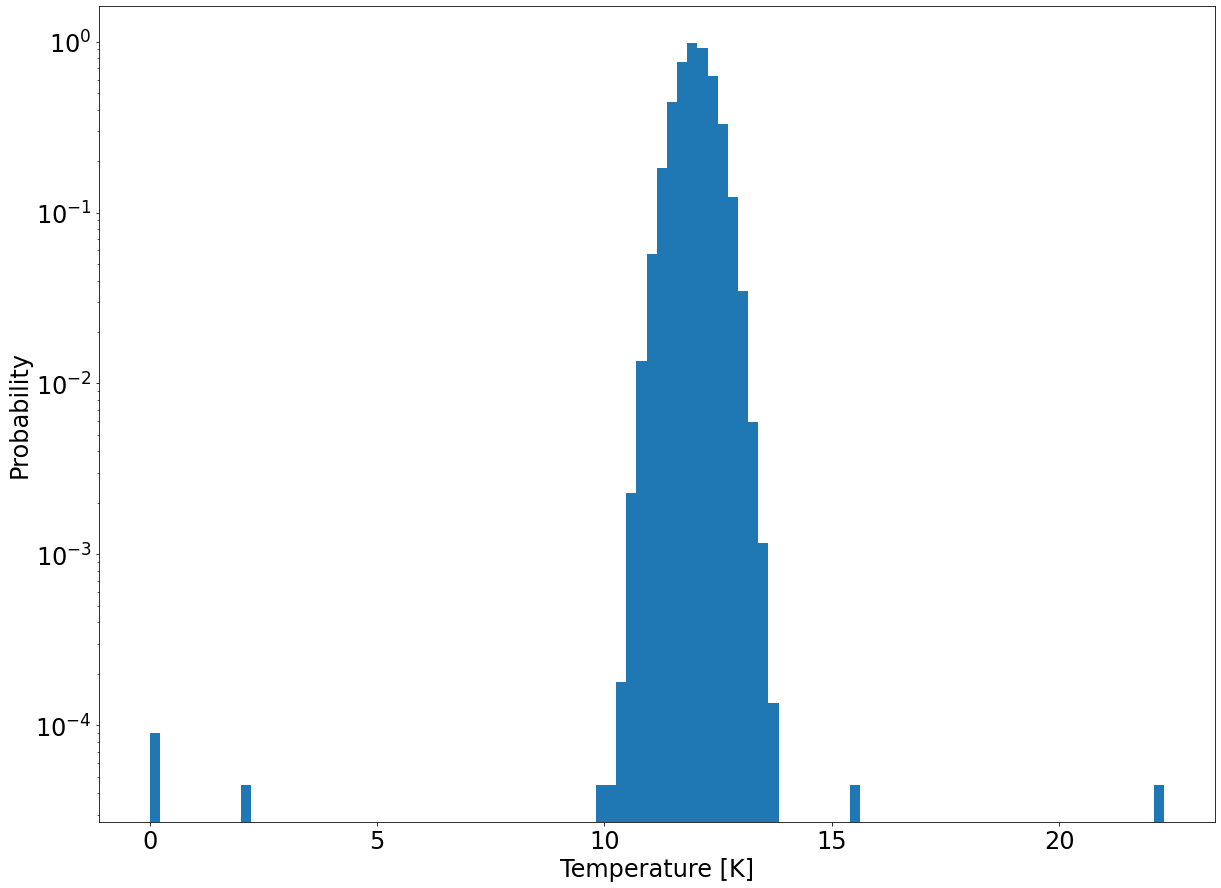

In [10]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)

plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel('Temperature [K]', size = 24)
plt.ylabel('Probability', size = 24)
plt.show()

This is a Gaussian distribution of 100k values with a mean of 12 K and width of 0.4 K plotted on a log y-axis. There are some outlier data points at 2.1, 0., 0., 15.6, 22.3, 12.7. 

What are the temperatures that give me the range of temperatures between 5$\sigma$ from both sides? This question will help me determine the range of temperatures to keep in my data.

$$
5\sigma =  \frac{1}{2} \text{erfc}\bigg(\frac{X}{\sqrt{2}}\bigg) dx \\
5\sigma =  \frac{1}{2} \text{erf}\bigg(\frac{X}{\sqrt{2}}\bigg) dx\\
$$ 
where x = temperature.


In [17]:
prob5sigma = 1/3.5e6

t1 = stats.norm.ppf(prob5sigma, loc = 12., scale = 0.4)
t2 = stats.norm.isf(prob5sigma, loc = 12., scale = 0.4)
print(t1, t2)

9.999747426038471 14.000252573961529


This gives me a temperature range of 10-14 K. So everything outside of that range, I can remove.

In [12]:
print(len(d))
mask = np.logical_or(d< 10, d>14)
bad_data = d[mask]
print(bad_data)

100008
[ 2.1  0.   0.  15.6 22.3]


|                | True T | Bad T |
|----------------|--------|-------|
| Your Test Good | 100000 | 3     |
| Your Test Bad  | 0      | 5     |

B) It depended on where I chose to be too small of a probability of happening with regular noise. I chose that to be 5$\sigma$ but it could have been any $\sigma$. It isn't a predictable quantity because it depends on how many points are outside of the data and what is choosen to be the maximum $\sigma$. 

C) Yes there is a chance of bad data getting in. If I chose a smaller $\sigma$ there is less chance of comission but that could also remove valid data points. 

# Problem 2

(2, 100000)


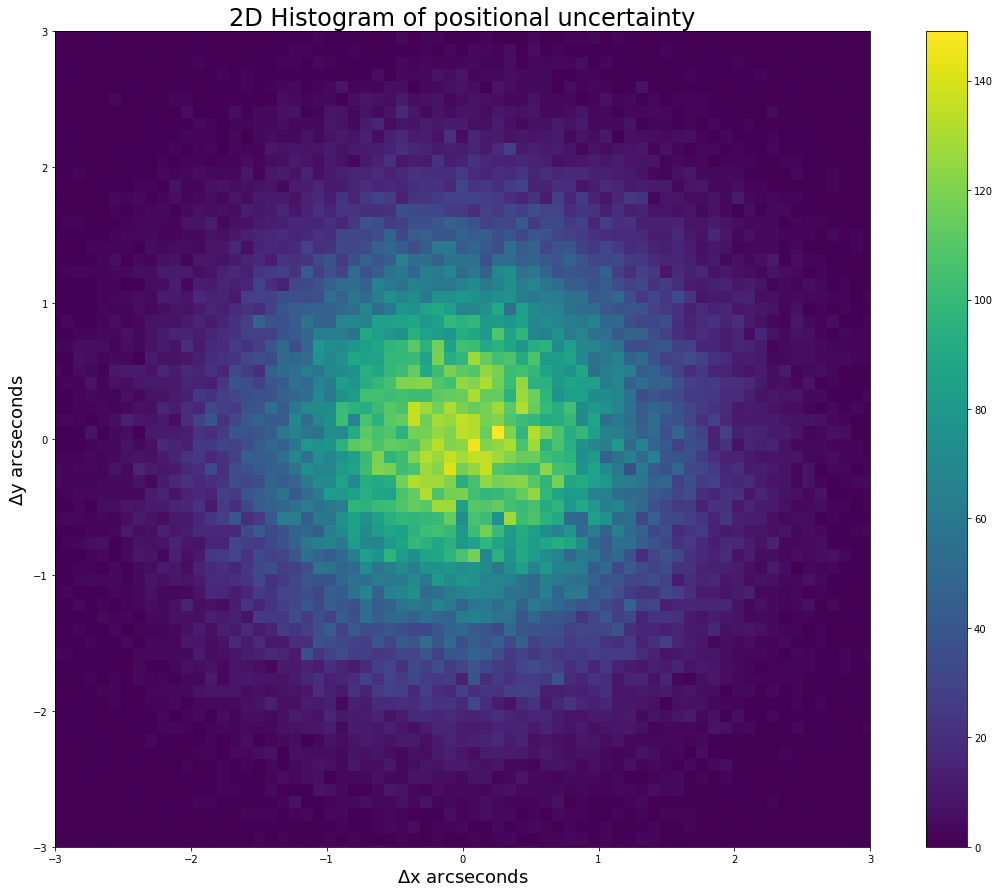

In [13]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
print(a.shape)
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=False);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)
plt.show()

1. If the background distribution is Rayleigh, what is the value that corresponds to 5$\sigma$? To be more signal-like, the distance has to be greater. So we integrate inward from the right starting at infinity.

2. 
$$
5\sigma = \frac{1}{2} \text{erfc}\bigg(\frac{X}{\sqrt{2}}\bigg)
$$

3. 5$\sigma$ is 5.5 arcseconds or greater.

In [15]:
dist5sigma = stats.rayleigh.isf(prob5sigma)
print(dist5sigma)

5.489676406940512


# Problem 3

1. Assuming a background signal of 1 cosmic ray per minute (Poisson distribution), what is the difference in signal if we see 6800 cosmic rays total for 8 hours a night for 15 days? This is the same as having 7200 trials. We would want to integrate from X to $\infty$ since the moon blocks out rays making total number of detected rays smaller.

2. $$P(\lambda) = \frac{\lambda^k e{-\lambda}}{k!}; \,\text{where } \lambda = 1\\
   X\sigma = \frac{1}{2} \text{erfc}\bigg(\frac{X}{\sqrt{2}}\bigg)
$$

3. The significance is 0.6$\sigma$

In [24]:
minutes = 7200
rays_seen = 6800
probability = stats.poisson.sf(minutes/rays_seen, 1)
sigma = stats.norm.isf(probability)

print(sigma)

0.6303245937410166
